In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from typing import Tuple

In [65]:
def normalize_image(
    image: np.ndarray, target_range: Tuple[float, float] = (0, 1)
) -> np.ndarray:
    """
    Normalize an image to the target range.

    Parameters:
    - image: Input grayscale image as a NumPy array.
    - target_range: Tuple specifying the min and max values after normalization.

    Returns:
    - Normalized image.
    """
    # Compute the min and max values of the input image
    min_val, max_val = np.min(image), np.max(image)

    # Normalize the image to the range [0, 1]
    normalized_image = (image - min_val) / (max_val - min_val + 1e-5)  # Add a small epsilon to avoid division by zero

    # Scale to the target range
    normalized_image = (
        normalized_image * (target_range[1] - target_range[0]) + target_range[0]
    )

    return normalized_image

In [66]:
def segment(image: np.ndarray, clusters: int = 5) -> np.ndarray:
    """
    Cluster and threshold a grayscale image using opencv's kmeans() function.

    Parameters:
    - image: Input grayscale image as a NumPy array.
    - clusters: Number of clusters (K parameter or KMeans algorithm)

    Returns:
    - Clustered and Thresholded grayscale image
    """

    ## Convert image to fp32 if not already.
    if image.dtype != np.float32:
        image = np.float32(image)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

    _, labels, centers = cv2.kmeans(
        image, clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    segmented_image = segmented_data.reshape((image.shape))

    return segmented_image

In [67]:
IMAGES_PATH = "../outputs/Transfer-Learning/gen-2"
IMAGES = os.listdir(IMAGES_PATH)
CLUSTERS = 3

In [68]:
cluster_data = dict()

for image_name in tqdm(IMAGES, desc="Processing Images"):
    image_path = os.path.join(IMAGES_PATH, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    segmented_image = segment(image, CLUSTERS)
    cluster_data[image_name] = (image, segmented_image)

Processing Images: 100%|██████████| 654/654 [00:01<00:00, 583.20it/s]


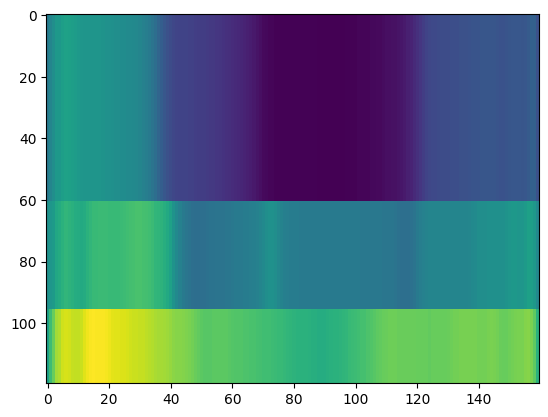

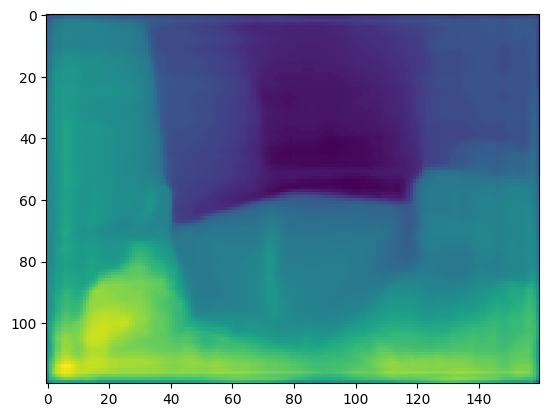

In [69]:
plt.imshow(cluster_data["10.png"][1])
plt.show()
plt.imshow(cluster_data["10.png"][0])